##**Adult Income prediction**

#**Project Overview:**
This machine learning project utilizes the 'adult.csv' dataset to perform classification and regression tasks, focusing on predictive modeling of income levels based on demographic and employment data. Advanced techniques including ensemble methods and PCA are employed to enhance model accuracy and efficiency. The analysis aims to identify optimal modeling strategies and their practical implications in workforce analytics.

#**Steps Involved :**
#**Step 1: Data Preparation and Classification**
#**Dataset Description**:
Dataset Consists of 32,561 entries with attributes,particularly useful for binary classification tasks, focusing on predicting the income level threshold of over or under $50,000.

#**Data Loading**:
Loading the Dataset "adult.csv" by using pandas in Python import the library with "import pandas as pd", then read the CSV file into a DataFrame using "data".

#**Data preprocessing**:
**Handling Missing Value** :Replaces missing values in the columns denoted by '?' with 'Unknown' to maintain data integrity.

**One-Hot Encoding:** Here,The 'occupation' column, a categorical variable, has been chosen as a one categorical variable which is considering the most relavant variable used to predict the target variable is transformed using one-hot encoding. This creates binary columns for each category and is essential for models that require numerical input.

**Binary Encoding:** The 'income' column is encoded into a binary format where '>50K' is represented by 1 and '<=50K' by 0. This step prepares the target variable for binary classification tasks.

**Feature Selection and Merging:** Additional relevant features like 'age', 'education.num', and 'hours.per.week' are selected because while choosing Occupation column itself cannot able to get the accuracy properly, so it would be  helpful to get more accurate to predict the target variable . The encoded 'occupation' data is merged back into the main dataset to create a comprehensive feature set for modeling.

#**Step 2: Modeling**
**Logistic Regression** is chosen for its simplicity, interpretability, and efficiency, making it a suitable baseline model for comparison.

**Decision Trees** are selected for their ability to capture non-linear relationships, provide interpretability, and handle mixed data types effectively.

**Random Forests** as an ensemble method of Decision Trees, are included for their ability to reduce overfitting, improve generalization, and handle missing data robustly.
The three classifiers were trained with different trainset ratio's.

**Cross Validation for 5-fold:** Cross validation applied on Decision tree classifier, because after modeling the accuracy for logistic is stable , randomforest it is low but for Decision tree it raised from 0.76 to 0.77 So, again tried with cross validation for 5-folds.

**Apply Ensemble Methods:**
**Bagging** Bagging with Logistic Regression and Decision Tree helps improve the stability and robustness of these models, especially when dealing with noisy data or high variance.
After doing the cross validation on Decision tree, applied ensemble bagging approach but still the accuracy remains same.

**Boosting**AdaBoost (Adaptive Boosting) with Decision Trees is used to create a strong learner by combining multiple weak learners, which often leads to better generalization and performance.

**Stacking**Stacking with Logistic Regression allows the model to learn how to best combine the strengths of these diverse models, potentially leading to improved accuracy and robustness.

In [42]:
import pandas as pd
from collections import Counter

In [43]:
url=("/adult.csv")
data=pd.read_csv(url)

In [44]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [45]:
missing_value_check = data.apply(lambda x:(x=='?').sum())
missing_value_check


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [46]:
data.replace('?', 'Unknown', inplace=True)


In [47]:
data['occupation'].describe()

count              32561
unique                15
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [48]:
data['occupation']=data['occupation'].replace('?','unknown')
occupation_encoded = pd.get_dummies(data['occupation'],prefix='occupation')
occupation_encoded=occupation_encoded.astype(int)
occupation_encoded.head()

,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [49]:
data['income_encoded'] = (data['income']=='>50K').astype(int)
model_data = pd.concat([data,occupation_encoded], axis=1)
selected_features = model_data[['age','education.num','hours.per.week']].join(occupation_encoded)
selected_features.head(), model_data['income_encoded'].head()

(   age  education.num  hours.per.week  occupation_Adm-clerical  \
 0   90              9              40                        0   
 1   82              9              18                        0   
 2   66             10              40                        0   
 3   54              4              40                        0   
 4   41             10              40                        0   
 
    occupation_Armed-Forces  occupation_Craft-repair  \
 0                        0                        0   
 1                        0                        0   
 2                        0                        0   
 3                        0                        0   
 4                        0                        0   
 
    occupation_Exec-managerial  occupation_Farming-fishing  \
 0                           0                           0   
 1                           1                           0   
 2                           0                           0   
 3        

In [50]:
from sklearn.model_selection import train_test_split
X=selected_features
y=model_data['income_encoded']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score

models={'Logistic Regression':LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
        }
train_sizes=[0.6, 0.7, 0.8]
results={}
for model_name, model in models.items():
  model_results=[]
  for size in train_sizes:
    X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=size,random_state=42)
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    model_results.append((accuracy,recall))
  results[model_name]=model_results

for model_name, model_results in results.items():
  print("Model",model_name)
  for i,size in enumerate(train_sizes):
    accuracy,recall=model_results[i]
    print(f"Train size: {size}, Accuracy: {accuracy:.2f}, Recall: {recall:.2f}")

Model Logistic Regression
Train size: 0.6, Accuracy: 0.80, Recall: 0.36
Train size: 0.7, Accuracy: 0.80, Recall: 0.36
Train size: 0.8, Accuracy: 0.80, Recall: 0.36
Model Decision Tree
Train size: 0.6, Accuracy: 0.76, Recall: 0.39
Train size: 0.7, Accuracy: 0.76, Recall: 0.39
Train size: 0.8, Accuracy: 0.77, Recall: 0.39
Model Random Forest
Train size: 0.6, Accuracy: 0.78, Recall: 0.43
Train size: 0.7, Accuracy: 0.78, Recall: 0.42
Train size: 0.8, Accuracy: 0.78, Recall: 0.41


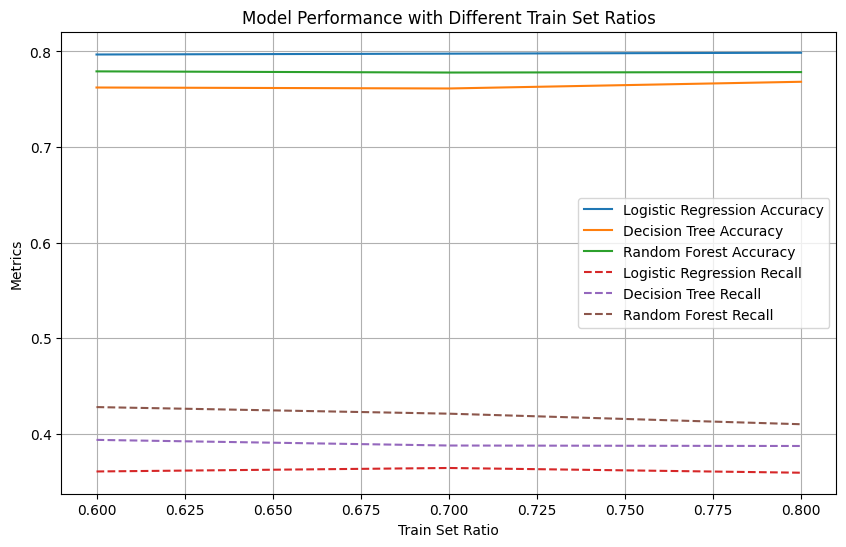

In [53]:
import matplotlib.pyplot as plt

accuracy_results={
    'Logistic Regression': [result[0] for result in results['Logistic Regression']],
    'Decision Tree': [result[0] for result in results['Decision Tree']],
    'Random Forest': [result[0] for result in results['Random Forest']]
}
recall_results = {
    'Logistic Regression': [result[1] for result in results['Logistic Regression']],
    'Decision Tree': [result[1] for result in results['Decision Tree']],
    'Random Forest': [result[1] for result in results['Random Forest']]
}
plt.figure(figsize=(10,6))
for model_name, accuracies in accuracy_results.items():
  plt.plot(train_sizes, accuracies, label=f'{model_name} Accuracy')

for model_name, recalls in recall_results.items():
  plt.plot(train_sizes, recalls, label=f'{model_name} Recall', linestyle='--')

plt.title('Model Performance with Different Train Set Ratios')
plt.xlabel('Train Set Ratio')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()


In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np
decision_tree_model = models['Decision Tree']
cv_scores = cross_val_score(decision_tree_model, X, y, cv=5)
print("Cross-Validation Accuracy Scores for Decision Tree:", cv_scores)
print("Average CV Accuracy for Decision Tree:", cv_scores.mean())
print("Standard Deviation in CV Scores:", np.std(cv_scores))

Cross-Validation Accuracy Scores for Decision Tree: [0.76370336 0.75322482 0.75875307 0.76597052 0.75291769]
Average CV Accuracy for Decision Tree: 0.7589138911743702
Standard Deviation in CV Scores: 0.005311889591849233


In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier

def monte_carlo_simulation(model, X, y, n_runs=100, test_size=0.3):
  accuracies=[]
  for _ in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size,random_state=np.random.randint(10000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
  return accuracies

bagging_logistic = BaggingClassifier(base_estimator=models['Logistic Regression'], n_estimators=10, random_state=42)
bagging_decision_tree = BaggingClassifier(base_estimator=models['Decision Tree'], n_estimators=10, random_state=42)
boosting_decision_tree = AdaBoostClassifier(base_estimator=models['Decision Tree'], n_estimators=50, random_state=42)
stacking_logistic = StackingClassifier(estimators=[('lr', models['Logistic Regression']), ('dt', models['Decision Tree']), ('rf', models['Random Forest'])], final_estimator=models['Logistic Regression'], cv=5)

ensemble_methods = {
    'Bagging with Logistic Regression': bagging_logistic,
    'Bagging with Decision Tree': bagging_decision_tree,
    'Boosting with Decision Tree': boosting_decision_tree,
    'Stacking with Logistic Regression': stacking_logistic
}
ensemble_accuracies = {name: monte_carlo_simulation(model, X, y) for name, model in ensemble_methods.items()}

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

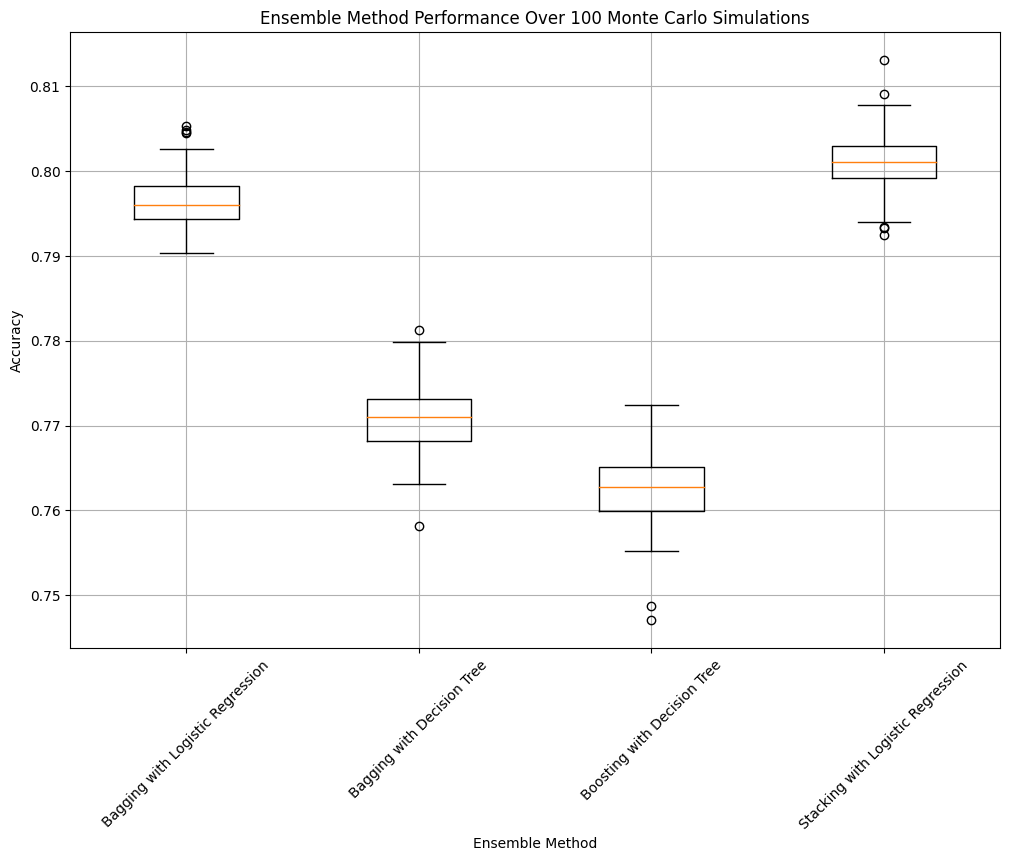

In [16]:
plt.figure(figsize=(12, 8))
plt.boxplot([ensemble_accuracies[name] for name in ensemble_methods], labels=[name for name in ensemble_methods])
plt.title('Ensemble Method Performance Over 100 Monte Carlo Simulations')
plt.ylabel('Accuracy')
plt.xlabel('Ensemble Method')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#**Analysing The best Classifier**
After doing the modeling using three classifier Logistic Regression, DecisionTreeClassifier and Random Forest by applying ensemble methods like bagging , boosting & stacking in 100 Monte carlo runs , Found Logistic Regression classifier is the best classifier when compared to other two classifier.

while modeling on DecisionTreeClassifier found the accuracy has raised from 76 to 77 so, applied cross validation technique, bagging & boosting methods still the accuracy remains same.

while modeling on Randomforest the accuracy has been low when compared to Logistic Regression.Finally considering **Logistic Regression is a best classifier.**

**Advantages of Logistic Regression:**
Interpretability: Logistic Regression provides interpretable results, allowing us to understand the impact of each feature on the predicted outcome.

Efficiency: It is computationally efficient and can handle large datasets with ease.
Regularization: Logistic Regression allows for regularization techniques to prevent overfitting.

Probabilistic Interpretation: It outputs probabilities of class membership, which can be useful for decision-making and risk assessment.

Robustness to Outliers: Logistic Regression is robust to outliers and noise in the data.

**Limitations of Logistic Regression:**
Assumption of Linearity: Logistic Regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable, which may not always hold true.

Limited Expressiveness: It may not capture complex non-linear relationships between features and the target variable effectively.

Feature Engineering: Logistic Regression relies on feature engineering to capture interactions and non-linear effects in the data.

Imbalanced Classes: It may not perform well with imbalanced classes without proper handling techniques.

Sensitive to Outliers: While robust to outliers, extreme outliers can still affect the model's performance.

In [17]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error

y_reg = model_data['age']
X_reg = selected_features.drop(['age'], axis=1)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
ensemble_regressors = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}
regression_results = {}
for name, model in ensemble_regressors.items():
  model.fit(X_train_reg, y_train_reg)
  y_pred_reg = model.predict(X_test_reg)
  mse = mean_squared_error(y_test_reg, y_pred_reg)
  regression_results[name] = mse

for name, mse in regression_results.items():
  print(f"{name} - MSE: {mse}")


Random Forest Regressor - MSE: 179.0915580261091
AdaBoost Regressor - MSE: 188.79894680295524
Gradient Boosting Regressor - MSE: 167.62684200509952


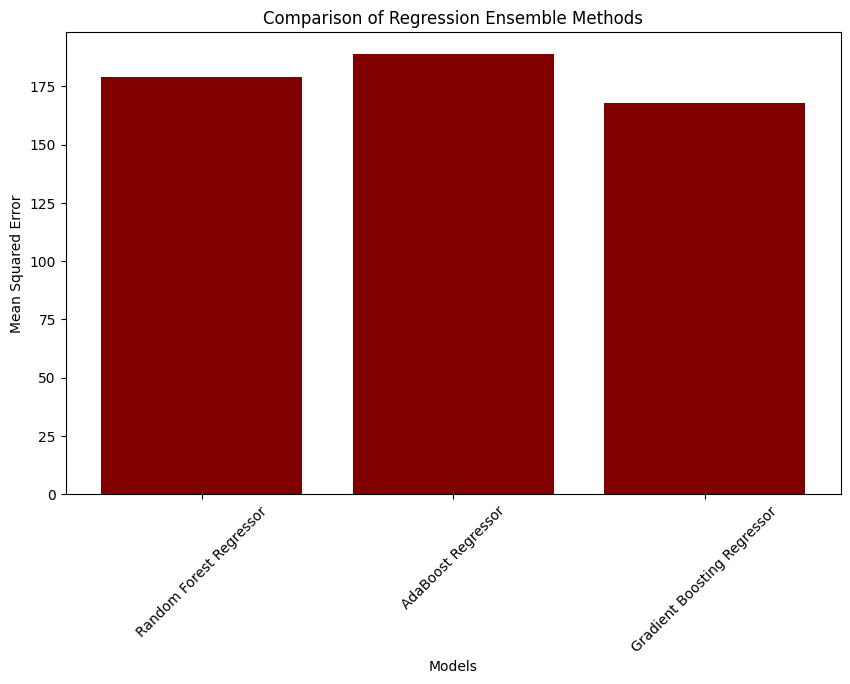

In [18]:
plt.figure(figsize=(10, 6))
models = list(regression_results.keys())
mse_values = list(regression_results.values())
plt.bar(models, mse_values, color='maroon')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.title('Comparison of Regression Ensemble Methods')
plt.show()

#**Perform Regression Analysis**

Each ensemble regressor model offers a unique approach to combining multiple regressors to improve predictive performance, reduce overfitting, and handle complex patterns in the data.

**Random Forest Regressor**:Effective for handling non-linear relationships and interactions in the data

**AdaBoost Regressor**: Sequentially trains multiple weak learners (regressors) on the data, with each subsequent learner focusing more on the instances that the previous ones misclassified

**Gradient Boosting Regressor** Often yields better predictive performance compared to other boosting methods due to its gradient-based optimization approach

In [38]:
data.replace('?', pd.NA, inplace=True)

categorical_columns = ['workclass', 'marital.status', 'occupation']
numerical_columns = ['age', 'education.num', 'hours.per.week', 'capital.gain']
data_encoded = pd.get_dummies(data[categorical_columns], dummy_na=True)  # dummy_na=True will create NaN columns for missing values
data_encoded.head()
selected_features1 = pd.concat([data[numerical_columns], data_encoded], axis=1).astype(int)
selected_features1.head()



,age,education.num,hours.per.week,capital.gain,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_unknown,occupation_nan
0,90,9,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,82,9,18,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66,10,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,54,4,40,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,41,10,40,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


#**Applying Feature Extraction**

By doing feature Engineering on workclass, marital.status & occupation will easy to convert the categorical variable to  numerical format.Including numerical variable age,education.num,hours.per.week & capital.gain all variables are included to train.

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_features1)
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)
num_components = pca.n_components_
explained_variance = pca.explained_variance_ratio_
num_components, explained_variance, sum(explained_variance)


(26,
 array([0.07400633, 0.06789945, 0.05208886, 0.04307276, 0.04091855,
        0.03779195, 0.03528875, 0.03385859, 0.03302665, 0.03224134,
        0.03174399, 0.03062003, 0.03032088, 0.03021199, 0.0299644 ,
        0.02938847, 0.02902948, 0.02882151, 0.02869569, 0.02859783,
        0.02853413, 0.02825225, 0.02745025, 0.02660469, 0.02597991,
        0.02517308]),
 0.9095817994059441)

**PCA** is preferred over LDA for dimensionality reduction in the Adult Income Prediction dataset due to its unsupervised nature, suitability for continuous output, and simplicity in implementation and computational efficiency.

The features and then applies Principal Component Analysis (PCA) to reduce dimensionality while retaining 90% of the variance, providing information on the number of components selected and their explained variance ratios.

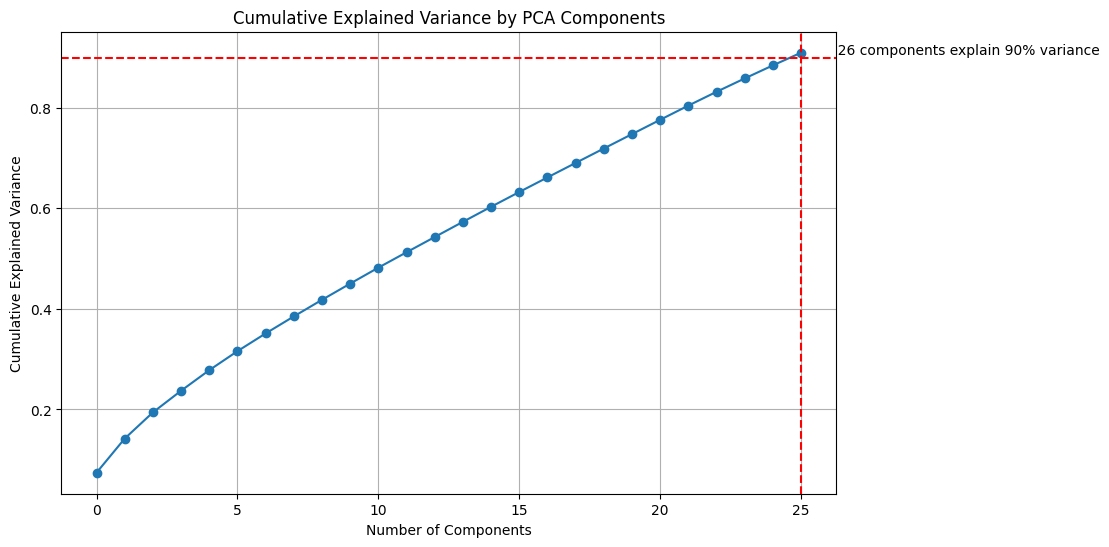

In [40]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--')
plt.axvline(x=num_components - 1, color='r', linestyle='--')  # Subtract 1 because index starts at 0
plt.text(num_components, 0.9, f"  {num_components} components explain 90% variance", verticalalignment='bottom')
plt.show()


In [41]:
from sklearn.metrics import classification_report
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_lda, test_size=0.3, random_state=42)

clf_pca = LogisticRegression(max_iter=1000)
clf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
report_pca = classification_report(y_test_pca, y_pred_pca)
accuracy_pca, report_pca


(0.846043607329307,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.93      0.90      7429\n           1       0.73      0.57      0.64      2340\n\n    accuracy                           0.85      9769\n   macro avg       0.80      0.75      0.77      9769\nweighted avg       0.84      0.85      0.84      9769\n')

#**Applied Logistic Regression Classifier**

**With Feature Extraction (PCA):**
While using PCA on extracted features got Accuracy: 84% on Logistic Classifier.

Utilizing feature extraction techniques like PCA likely reduced the dimensionality of the data while preserving important information, resulting in improved model performance.

**Without Feature Extraction**
While doing normal ensemble methods on specific categorical variable got Accuracy: 80%
Without feature extraction, the model used the original features directly. While still achieving a respectable accuracy, it may have been affected by higher dimensionality and potential noise in the data.